In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

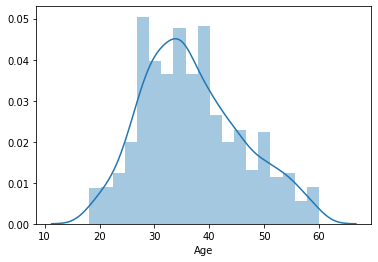

In [6]:
sns.distplot(df.Age)

In [7]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

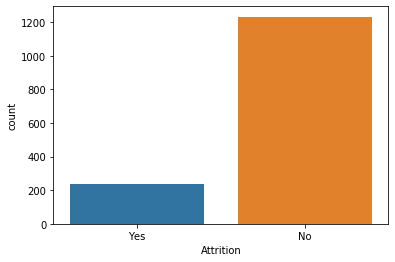

In [8]:
sns.countplot(df.Attrition)

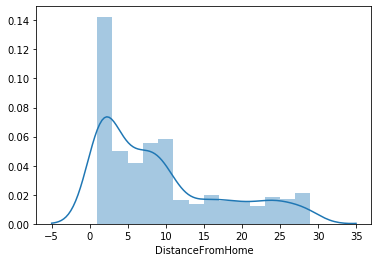

In [9]:
sns.distplot(df.DistanceFromHome)

In [10]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

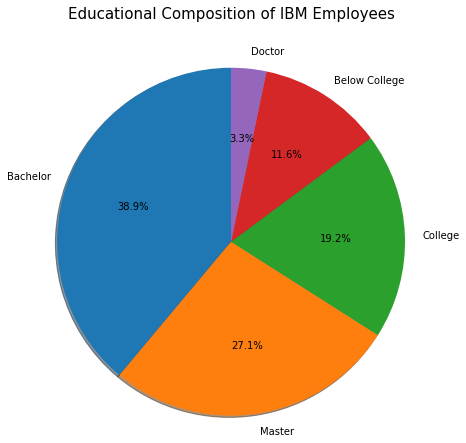

In [11]:
plt.pie(df.Education.value_counts(),labels=['Bachelor','Master','College','Below College','Doctor'], autopct='%1.1f%%', shadow=True, startangle=90, radius=2)
plt.title('Educational Composition of IBM Employees', y=1.5, size=15)
plt.show()

In [12]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

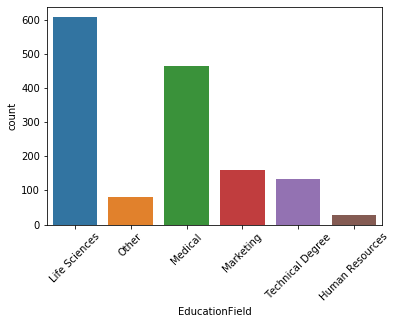

In [14]:
sns.countplot(df.EducationField)
plt.xticks(rotation=45)
plt.show()

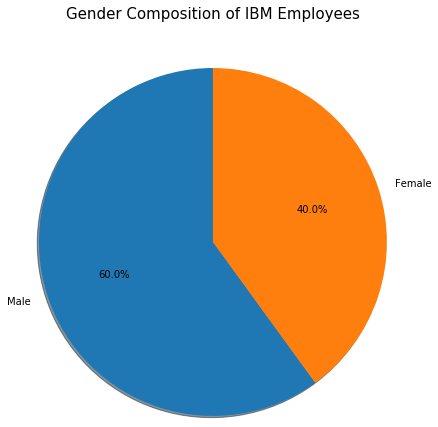

In [15]:
plt.pie(df.Gender.value_counts(),labels=['Male','Female'], autopct='%1.1f%%', shadow=True, startangle=90, radius=2)
plt.title('Gender Composition of IBM Employees', y=1.5, size=15)
plt.show()

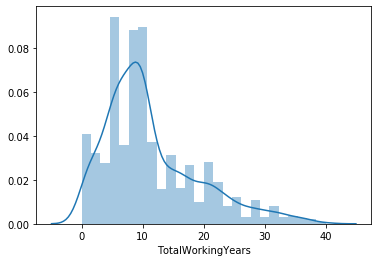

In [16]:
sns.distplot(df.TotalWorkingYears)

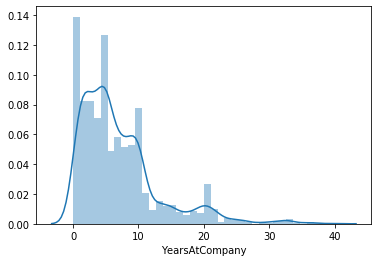

In [17]:
sns.distplot(df.YearsAtCompany)

## Hypothesis Testing - Attrition vs. No Attrition

In [18]:
attrition = df[df.Attrition=='Yes']
noattrition = df[df.Attrition=='No']

In [20]:
print(len(attrition))
print(len(noattrition))

237
1233


## Preprocessing

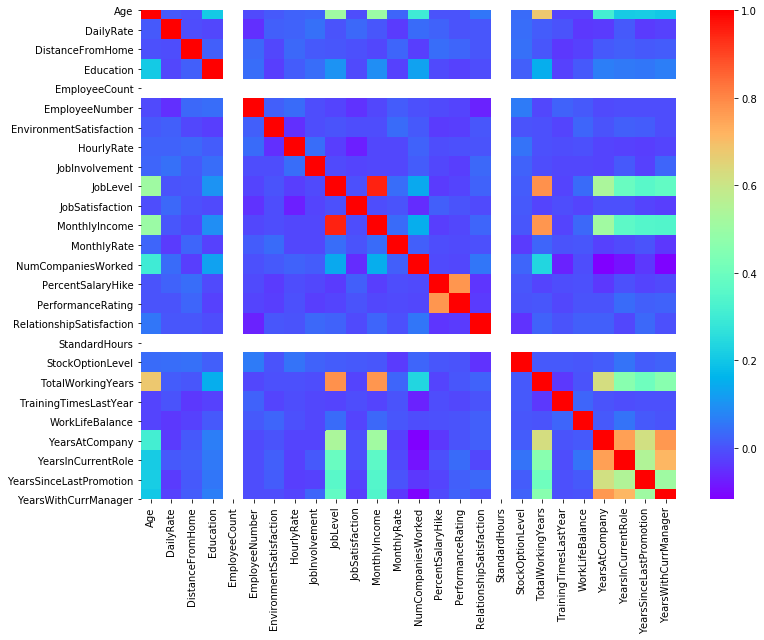

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap='rainbow')
plt.show()

In [22]:
X = df.drop(['Attrition'],axis=1)
Y = df.Attrition

In [23]:
X.drop(['MonthlyIncome','PercentSalaryHike','TotalWorkingYears'],axis=1,inplace=True)

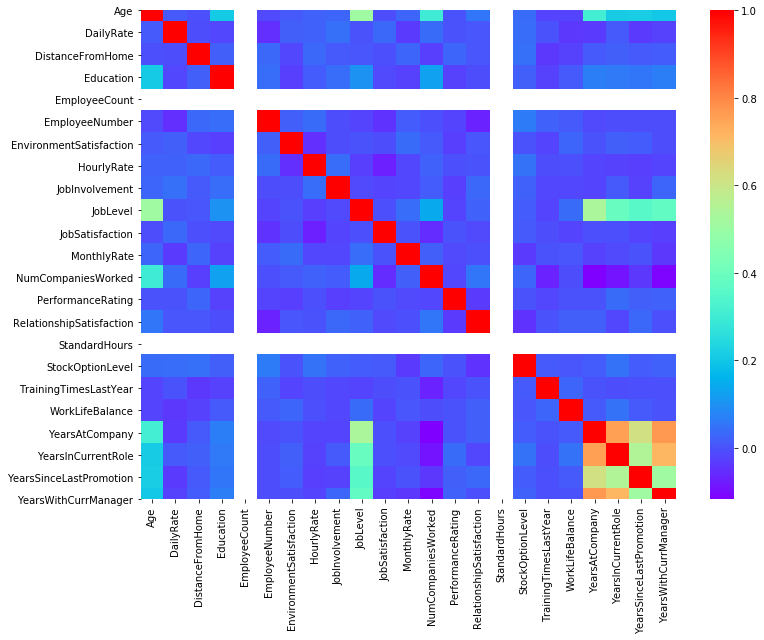

In [24]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap='rainbow')
plt.show()

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

In [26]:
X.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [27]:
recode = ['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating',
         'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
for feature in recode:
    X[feature]=X[feature].astype('str')

In [28]:
X = pd.get_dummies(X)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 79 columns):
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
HourlyRate                           1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
StandardHours                        1470 non-null int64
TrainingTimesLastYear                1470 non-null int64
YearsAtCompany                       1470 non-null int64
YearsInCurrentRole                   1470 non-null int64
YearsSinceLastPromotion              1470 non-null int64
YearsWithCurrManager                 1470 non-null int64
BusinessTravel_Non-Travel            1470 non-null uint8
BusinessTravel_Travel_Frequently     1

In [30]:
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [31]:
Y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [32]:
Y.replace('Yes',1,inplace=True)
Y.replace('No',0,inplace=True)

## Predicting Employee Attrition

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.9135082604470359
testing accuracy : 0.8503401360544217


In [42]:
from sklearn.metrics import confusion_matrix
y_hat = model.predict(x_test)
logreg_cf = confusion_matrix(y_test, y_hat)

In [43]:
logreg_cf

array([[349,  12],
       [ 54,  26]])

### KNearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier()
model.fit(x_train, y_train)
Yhat_train = model.predict(x_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(x_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
print("Training Accuracy:",acc_train)
print("Test Accuracy:",acc_test)

cm_knn = confusion_matrix(y_test, Yhat_test)
print(cm_knn)

Training Accuracy: 0.8493683187560739
Test Accuracy: 0.7936507936507936
[[349  12]
 [ 79   1]]


### Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
from sklearn.metrics import accuracy_score
print('Training Accuracy: ',accuracy_score(y_train, y_pred_dt_train))
print('Test Accuracy: ',accuracy_score(y_test, y_pred_dt))

[[316  45]
 [ 52  28]]
Training Accuracy:  1.0
Test Accuracy:  0.780045351473923


In [65]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [66]:
data_feature_names = list(X.columns)
dot_data = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

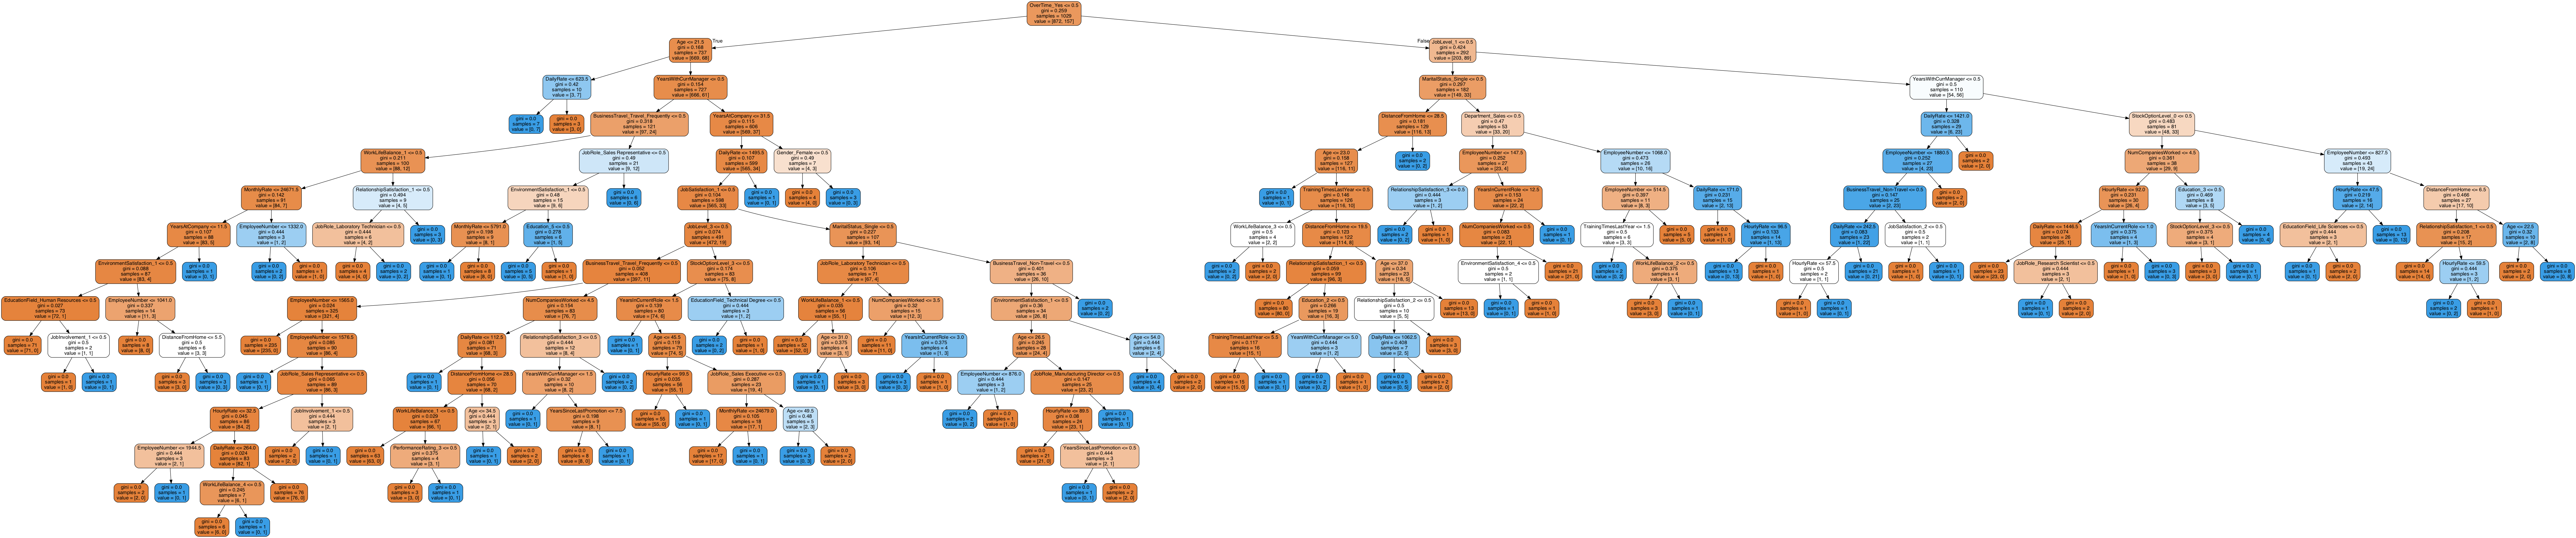

In [67]:
Image(graph.create_png())

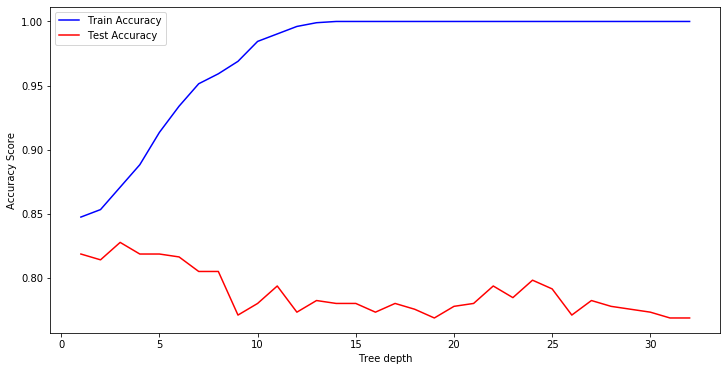

In [69]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

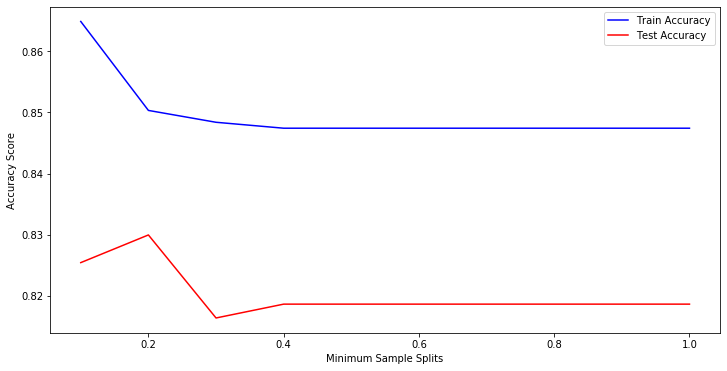

In [70]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_splits, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Minimum Sample Splits')
plt.legend()
plt.show()

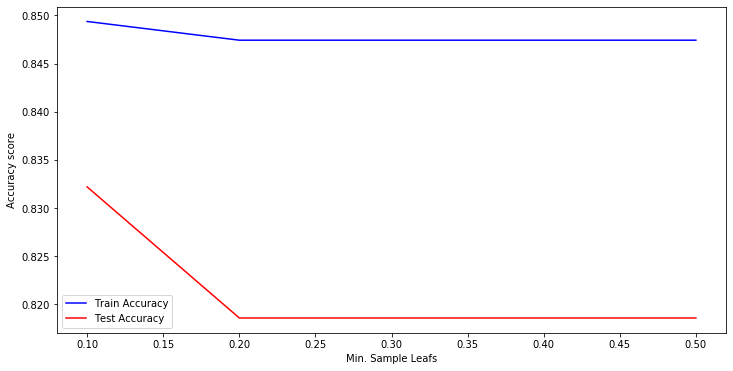

In [71]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

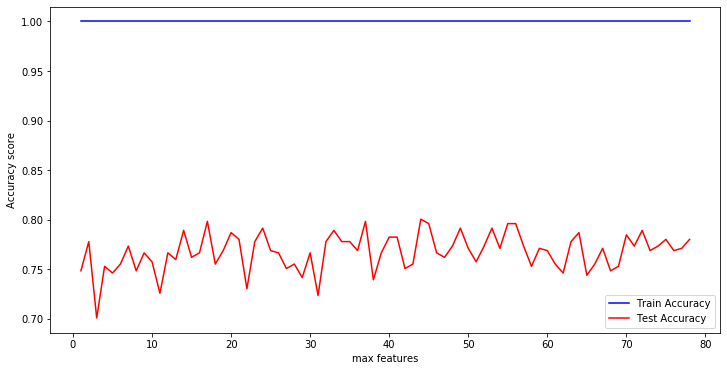

In [72]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train Accuracy')
plt.plot(max_features, test_results, 'r', label='Test Accuracy')

plt.ylabel('Accuracy score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=0.2, min_samples_leaf=0.1)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
from sklearn.metrics import accuracy_score
print('Training Accuracy: ',accuracy_score(y_train, y_pred_dt_train))
print('Test Accuracy: ',accuracy_score(y_test, y_pred_dt))

[[341  20]
 [ 54  26]]
Training Accuracy:  0.8493683187560739
Test Accuracy:  0.8321995464852607


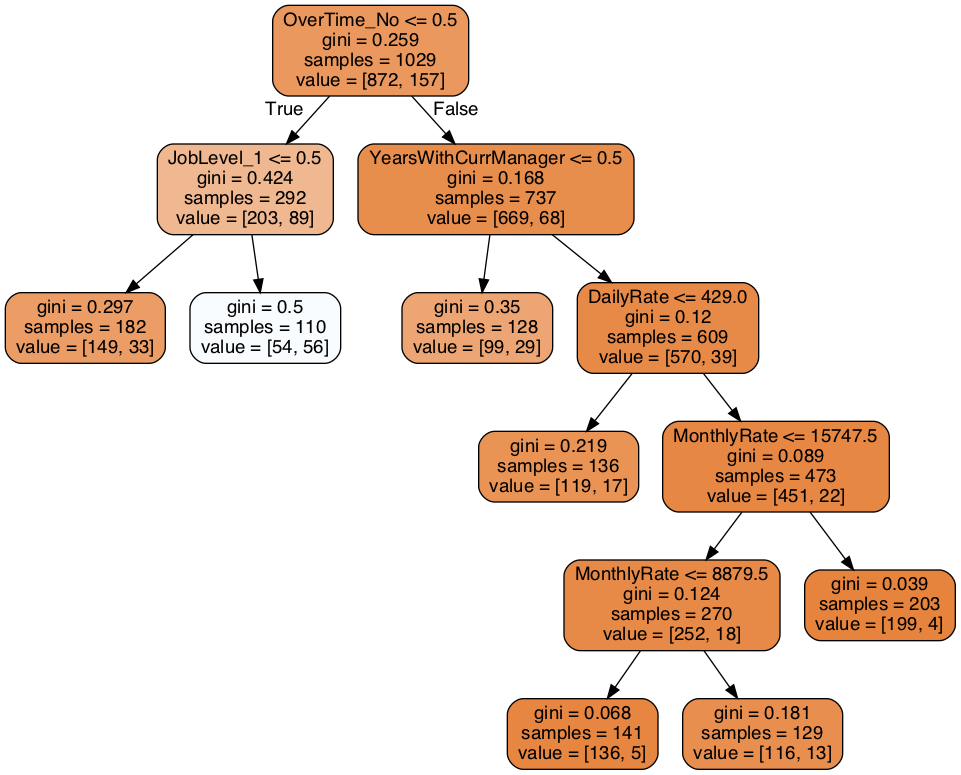

In [75]:
data_feature_names = list(X.columns)
dot_data = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### SVC

## Predicting Employee Performance Rating

In [77]:
X2 = df.drop(['PerformanceRating'],axis=1)
Y2 = df['PerformanceRating']

In [79]:
X2.drop(['MonthlyIncome','PercentSalaryHike','TotalWorkingYears'],axis=1,inplace=True)

In [80]:
recode = ['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
         'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
for feature in recode:
    X2[feature]=X2[feature].astype('str')

In [81]:
X2 = pd.get_dummies(X2)

In [82]:
Y2.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [83]:
Y2.replace('3',0,inplace=True)
Y2.replace('4',1,inplace=True)

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2,Y2,test_size=0.3)

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.8561710398445093
testing accuracy : 0.8231292517006803


In [86]:
y_hat = model.predict(x_test)
logreg_cf = confusion_matrix(y_test, y_hat)

In [87]:
logreg_cf

array([[363,   0],
       [ 78,   0]])

In [88]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
Yhat_train = model.predict(x_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(x_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
print("Training Accuracy:",acc_train)
print("Test Accuracy:",acc_test)

cm_knn = confusion_matrix(y_test, Yhat_test)
print(cm_knn)

Training Accuracy: 0.8600583090379009
Test Accuracy: 0.8049886621315193
[[355   8]
 [ 78   0]]


In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
y_pred_dt = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print('Training Accuracy: ',accuracy_score(y_train, y_pred_dt_train))
print('Test Accuracy: ',accuracy_score(y_test, y_pred_dt))

[[289  74]
 [ 70   8]]
Training Accuracy:  1.0
Test Accuracy:  0.673469387755102
